In [1]:
# IMAGE PREPROCESSING FUNCTIONS FOR USE IN MODEL DEVELOPMENT, EVALUATION, AND PRODUCTION
import numpy as np
import pandas as pd
import PIL as pil
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
import tempfile
import pickle
import time
import gc
import skimage.filters
import cv2
import watermark
import joblib
import math
from skimage.measure import block_reduce
from image_preprocessing import standardize_image_dataset,resize_dataset,binarize_dataset,crop_dataset,process_dataset_blur,do_pooling_dataset
from pipeline import model_pipeline

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,CategoricalNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.base import clone
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [3]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)

In [4]:
train = gen.flow_from_directory("Brain Tumor Data Set/Brain Tumor Data Set/",
                               target_size = (256,256),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 3681 images belonging to 2 classes.


In [5]:
type(train)

keras.preprocessing.image.DirectoryIterator

In [6]:
val = gen.flow_from_directory("Brain Tumor Data Set/Brain Tumor Data Set/",
                               target_size = (256,256),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices

Found 919 images belonging to 2 classes.


In [7]:
all_training_data = pickle.load(open('Amit/Labeled Data/train_data.pkl','rb'))
train_X = all_training_data.iloc[:,:-1]
train_y = all_training_data.iloc[:,-1]
del all_training_data
gc.collect()



all_testing_data = pickle.load(open('Amit/Labeled Data/training_data.pkl','rb'))
test_X = all_testing_data.iloc[:,:-1]
test_y = all_testing_data.iloc[:,-1]
del all_testing_data
gc.collect()


train_X_array = train_X.to_numpy().reshape(3220, 256, 256, 1)


train_y_array = np.array(train_y)

test_X_array = test_X.to_numpy().reshape(1380, 256, 256, 1)


test_y_array = np.array(test_y)


In [8]:
train_X_array[0]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [9]:
train_X_array.shape 

(3220, 256, 256, 1)

In [10]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [11]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(256,256, 1)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               33554560  
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               5

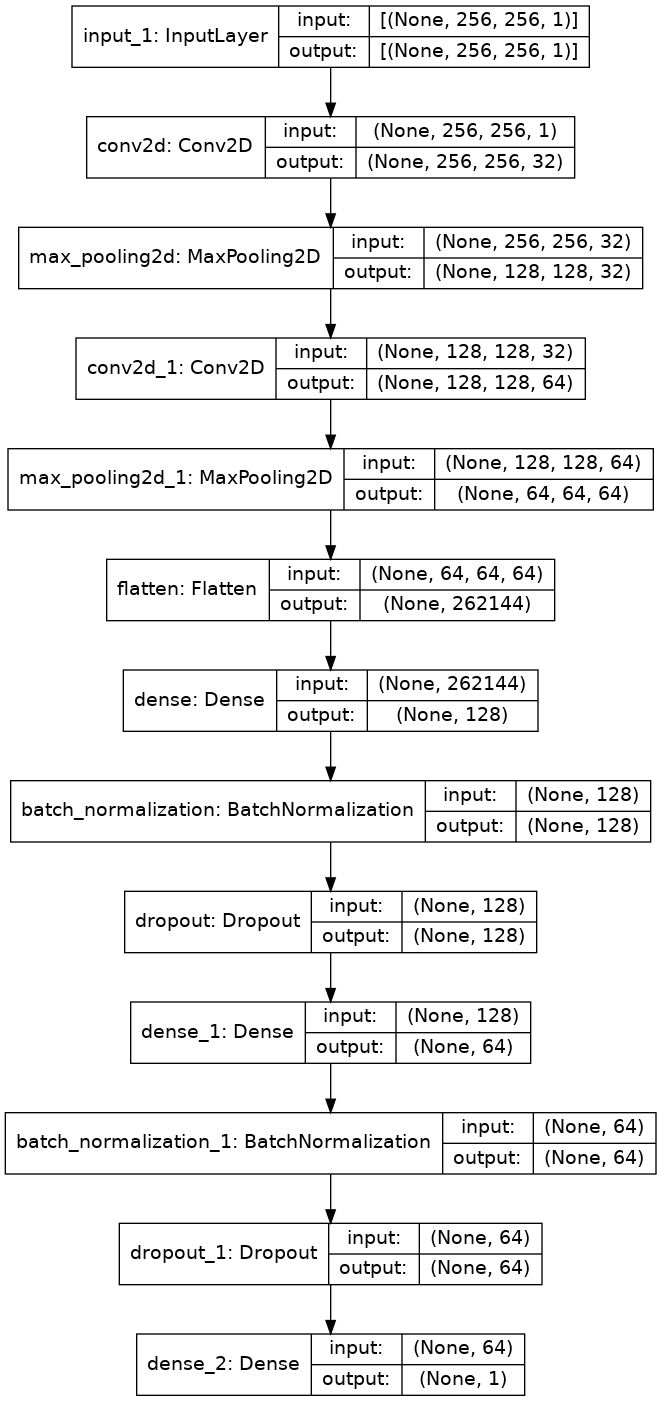

In [13]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [14]:
train_X_array.shape

(3220, 256, 256, 1)

In [15]:
# %%time

# history = model.fit(train_X_array, train_y_array,verbose=1, epochs=20)

In [16]:
# # plot training cost and accuracy
# hist = history.history
# fig = plt.figure(figsize=(12, 5))
# ax = fig.add_subplot(1, 2, 1)
# ax.plot(hist['loss'], lw=3)
# ax.set_title('Training loss (cost)', size=15)
# ax.set_xlabel('Epoch', size=15)
# ax.tick_params(axis='both', which='major', labelsize=15)

# ax = fig.add_subplot(1, 2, 2)
# ax.plot(hist['accuracy'], lw=3)
# ax.set_title('Training accuracy', size=15)
# ax.set_xlabel('Epoch', size=15)
# ax.tick_params(axis='both', which='major', labelsize=15)
# plt.tight_layout()

In [17]:
# test_loss, test_acc = model.evaluate(test_X_array,  test_y_array, verbose=2)

# print('\nTest accuracy:', test_acc)

In [18]:
# np.mean(hist['accuracy'])

In [19]:
# hist

In [20]:
# history

In [21]:
# print(history)

In [22]:
%%time

history = model.fit(train_X_array, train_y_array, verbose=1, epochs=100)

Epoch 1/100
101/101 [==============================] - 68s 663ms/step - loss: 0.5969 - accuracy: 0.7075
Epoch 2/100
101/101 [==============================] - 66s 654ms/step - loss: 0.3882 - accuracy: 0.8292
Epoch 3/100
101/101 [==============================] - 66s 654ms/step - loss: 0.2101 - accuracy: 0.9242
Epoch 4/100
101/101 [==============================] - 66s 657ms/step - loss: 0.1074 - accuracy: 0.9674
Epoch 5/100
101/101 [==============================] - 66s 652ms/step - loss: 0.1782 - accuracy: 0.9304
Epoch 6/100
101/101 [==============================] - 66s 653ms/step - loss: 0.1989 - accuracy: 0.9217
Epoch 7/100
101/101 [==============================] - 66s 654ms/step - loss: 0.0656 - accuracy: 0.9780
Epoch 8/100
101/101 [==============================] - 66s 657ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 9/100
101/101 [==============================] - 66s 655ms/step - loss: 0.0389 - accuracy: 0.9888
Epoch 10/100
101/101 [==============================] - 66s 658m

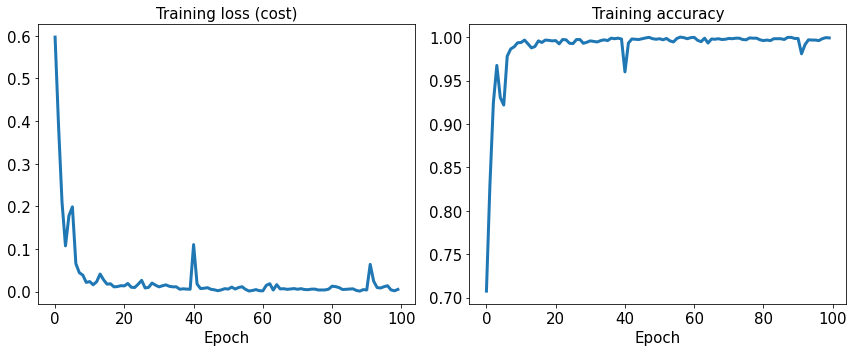

In [23]:
# plot training cost and accuracy
hist = history.history
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss (cost)', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

In [24]:
%%time

test_loss, test_acc = model.evaluate(test_X_array,  test_y_array, verbose=2)

print('\nTest accuracy:', test_acc)

44/44 - 6s - loss: 0.2105 - accuracy: 0.9609

Test accuracy: 0.960869550704956
CPU times: user 49.3 s, sys: 14.9 s, total: 1min 4s
Wall time: 6.64 s


In [27]:
np.mean(hist["accuracy"])

0.988813664317131

In [26]:
import sys
import pickle
sys.getsizeof(pickle.dumps(history))


TypeError: can't pickle weakref objects

In [29]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(256,256, 1)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer = 'SGD',loss = BinaryCrossentropy(),metrics=['accuracy'])

In [30]:
%%time

history_sgd = model.fit(train_X_array, train_y_array, verbose=1, epochs=100)

Epoch 1/100
101/101 [==============================] - 58s 564ms/step - loss: 0.6222 - accuracy: 0.6848
Epoch 2/100
101/101 [==============================] - 57s 566ms/step - loss: 0.5283 - accuracy: 0.7429
Epoch 3/100
101/101 [==============================] - 56s 556ms/step - loss: 0.5047 - accuracy: 0.7565
Epoch 4/100
101/101 [==============================] - 56s 556ms/step - loss: 0.5274 - accuracy: 0.7388
Epoch 5/100
101/101 [==============================] - 56s 558ms/step - loss: 0.5698 - accuracy: 0.7096
Epoch 6/100
101/101 [==============================] - 56s 555ms/step - loss: 0.5555 - accuracy: 0.7180
Epoch 7/100
101/101 [==============================] - 56s 558ms/step - loss: 0.5317 - accuracy: 0.7441
Epoch 8/100
101/101 [==============================] - 56s 559ms/step - loss: 0.4700 - accuracy: 0.7817
Epoch 9/100
101/101 [==============================] - 57s 562ms/step - loss: 0.4226 - accuracy: 0.8134
Epoch 10/100
101/101 [==============================] - 57s 564m

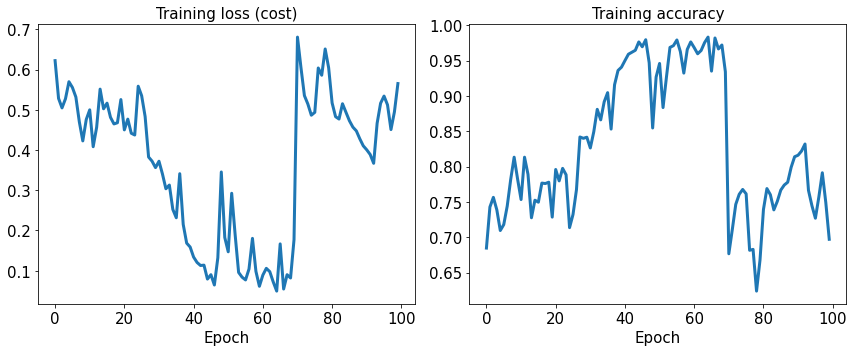

In [31]:
# plot training cost and accuracy
hist_sgd = history_sgd.history
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist_sgd['loss'], lw=3)
ax.set_title('Training loss (cost)', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist_sgd['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

In [32]:
%%time

test_loss, test_acc = model.evaluate(test_X_array,  test_y_array, verbose=2)

print('\nTest accuracy:', test_acc)

44/44 - 5s - loss: 0.8886 - accuracy: 0.5703

Test accuracy: 0.5702898502349854
CPU times: user 49 s, sys: 14.9 s, total: 1min 3s
Wall time: 5.55 s


In [33]:
np.mean(hist_sgd["accuracy"])

0.8299751555919648